<a href="https://colab.research.google.com/github/satwiksps/Deep-Learning/blob/main/Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
#Pima-Indian-Diabetes Dataset
from pandas import read_csv
url = 'https://raw.githubusercontent.com/erojaso/MLMasteryEndToEnd/master/data/pima-indians-diabetes.data.csv' #Load CSV using Pandas
column_names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'] #Define column names
data = read_csv(url, names=column_names) #Load CSV using Pandas
array = data.values #Convert to NumPy array
X = array[:,0:8] #Split into input column
Y = array[:,8] #Split into output column
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

In [3]:
scaler = StandardScaler ()
X_train = scaler . fit_transform ( X_train )
X_test = scaler . transform ( X_test )

In [4]:
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),  # First layer: Dense layer with 16 neurons, ReLU activation, and input shape defined by the number of features in X_train
    Dense(8, activation='relu'),  # Second layer: Dense layer with 8 neurons and ReLU activation
    Dense(1, activation='sigmoid')  # Output layer: Dense layer with 1 neuron and sigmoid activation
])

# Line 3: Compiling the model
model.compile(
    optimizer='adam',  # Optimizer: Adam optimizer
    loss='binary_crossentropy',  # Loss function: Binary cross-entropy
    metrics=['accuracy']  # Metrics: Accuracy
)

# Line 4: Training the model
history = model.fit(
    X_train,  # Training data features
    Y_train,  # Training data labels
    epochs=50,  # Number of epochs (iterations over the entire dataset)
    validation_split=0.2,  # Fraction of training data to be used as validation data
    batch_size=10  # Number of samples per gradient update
)

Epoch 1/50
42/42 [==============================] - 8s 58ms/step - loss: 0.6895 - accuracy: 0.5912 - val_loss: 0.6668 - val_accuracy: 0.6214
Epoch 2/50
42/42 [==============================] - 1s 17ms/step - loss: 0.6442 - accuracy: 0.7202 - val_loss: 0.6309 - val_accuracy: 0.7184
Epoch 3/50
42/42 [==============================] - 1s 19ms/step - loss: 0.6113 - accuracy: 0.7737 - val_loss: 0.6021 - val_accuracy: 0.7379
Epoch 4/50
42/42 [==============================] - 1s 14ms/step - loss: 0.5782 - accuracy: 0.7762 - val_loss: 0.5747 - val_accuracy: 0.7476
Epoch 5/50
42/42 [==============================] - 1s 12ms/step - loss: 0.5470 - accuracy: 0.7835 - val_loss: 0.5517 - val_accuracy: 0.7670
Epoch 6/50
42/42 [==============================] - 0s 10ms/step - loss: 0.5173 - accuracy: 0.7908 - val_loss: 0.5377 - val_accuracy: 0.7767
Epoch 7/50
42/42 [==============================] - 0s 5ms/step - loss: 0.4943 - accuracy: 0.7883 - val_loss: 0.5314 - val_accuracy: 0.7767
Epoch 8/50
42/

8/8 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

         0.0       0.80      0.81      0.81       162
         1.0       0.66      0.65      0.66        92

    accuracy                           0.75       254
   macro avg       0.73      0.73      0.73       254
weighted avg       0.75      0.75      0.75       254

Accuracy: 0.7519685039370079


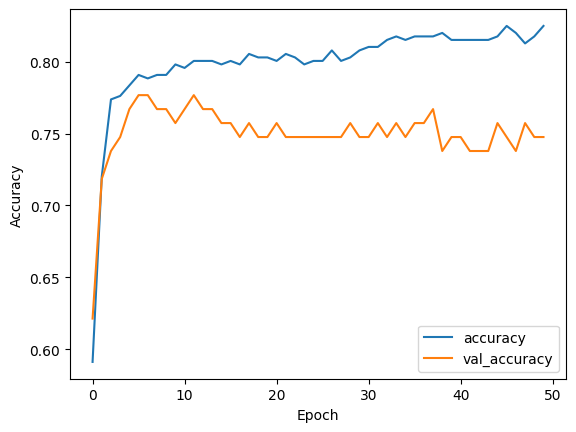

In [5]:
# Evaluate on test data
Y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Performance analysis
print(classification_report(Y_test, Y_pred))
print("Accuracy:", accuracy_score(Y_test, Y_pred))

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()